
 Silhouette Scores by K:
    K         WCSS  Silhouette Score
0   2  8893.537463          0.244423
2   4  8134.084270          0.057014
1   3  8428.550480          0.049253
7   9  7267.567006          0.043525
5   7  7570.035881          0.042019
3   5  7914.640254          0.038245
4   6  7730.012149          0.036639
6   8  7436.458490          0.032137
8  10  7241.717191          0.014365


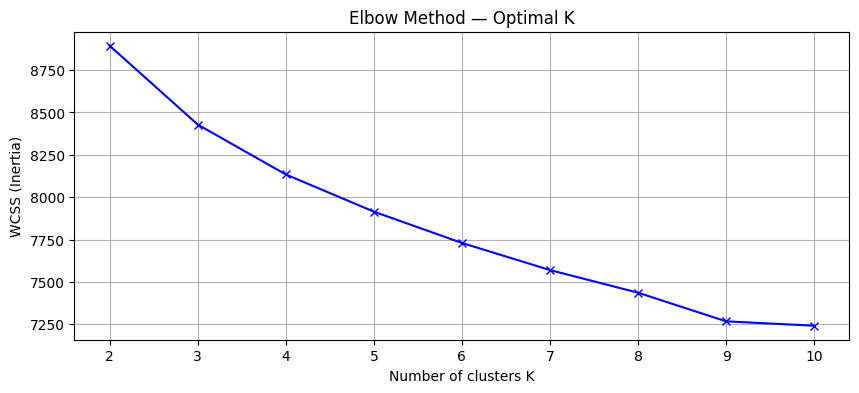

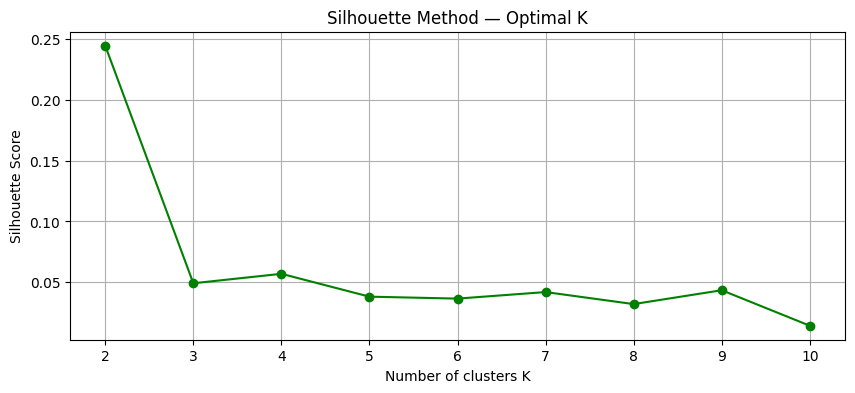

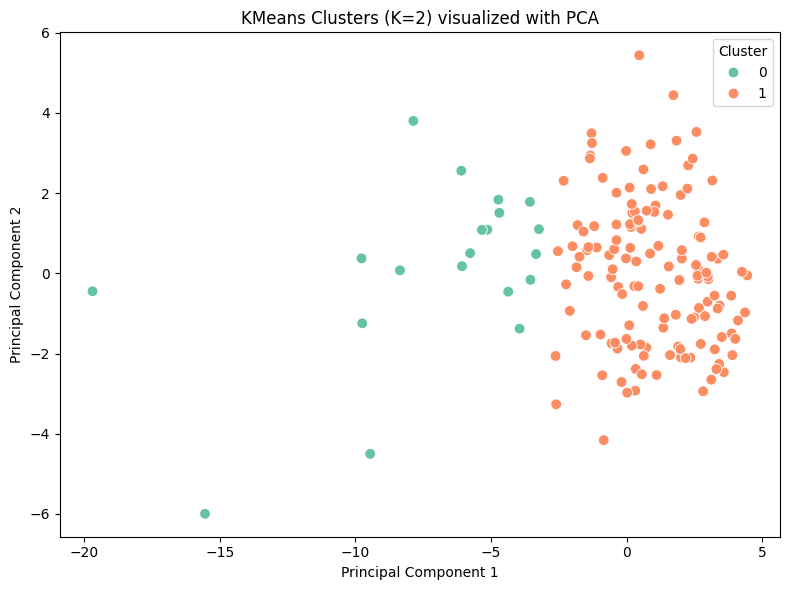

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# STEP 1 — Load and scale data
df = pd.read_excel("fully_encoded_dataset_complete.xlsx")
df_numeric = df.select_dtypes(include='number').dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# STEP 2 — Elbow & Silhouette
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# STEP 3 — Show results
silhouette_summary = pd.DataFrame({
    "K": list(K_range),
    "WCSS": wcss,
    "Silhouette Score": silhouette_scores
}).sort_values(by="Silhouette Score", ascending=False)

print("\n Silhouette Scores by K:")
print(silhouette_summary)

# Plot elbow
plt.figure(figsize=(10, 4))
plt.plot(K_range, wcss, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method — Optimal K')
plt.grid()
plt.show()

# Plot silhouette
plt.figure(figsize=(10, 4))
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method — Optimal K')
plt.grid()
plt.show()

# STEP 4 — Choose best K and apply KMeans
optimal_k = silhouette_summary.iloc[0]['K']
kmeans = KMeans(n_clusters=int(optimal_k), random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# STEP 5 — Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_vis = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_vis['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_vis, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title(f"KMeans Clusters (K={int(optimal_k)}) visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# STEP 1 — Load dataset
df = pd.read_excel("fully_encoded_dataset_complete.xlsx")

# STEP 2 — Select only numeric columns and drop NaNs
df_numeric = df.select_dtypes(include='number').dropna()

# STEP 3 — Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# STEP 4 — Apply KMeans (with K=2 as determined before)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# STEP 5 — Add cluster labels back to dataframe
df_clustered = df_numeric.copy()
df_clustered['Cluster'] = cluster_labels

# STEP 6 — Compute average profile of each cluster
cluster_profiles = df_clustered.groupby('Cluster').mean().T

# STEP 7 — Calculate difference between clusters
cluster_profiles['Difference'] = cluster_profiles[1] - cluster_profiles[0]

# STEP 8 — Sort by absolute difference
cluster_profiles_sorted = cluster_profiles.reindex(
    cluster_profiles['Difference'].abs().sort_values(ascending=False).index
)

# STEP 9 — Print top 10 differentiating features
print("\n🔍 Top 10 variables that differentiate the clusters:")
print(cluster_profiles_sorted.head(10))



🔍 Top 10 variables that differentiate the clusters:
Cluster                                                0         1  Difference
15. Require fossil fuel companies to pay a carb...  2.15  3.605839    1.455839
21. The head of state (president, monarch,...) ...  3.20  4.591241    1.391241
23. The governor (of your administrative region...  3.15  4.459854    1.309854
11. When do you think global warming will start...  2.15  0.854015   -1.295985
29. Support strategies of economy transition fr...  2.35  3.627737    1.277737
20. Do you think the following should be doing ...  3.45  4.700730    1.250730
26. Should global warming be a priority for the...  2.25  3.481752    1.231752
22. The parliament/assembly/congress legislatur...  3.40  4.620438    1.220438
14. Regulate carbon dioxide (the primary greenh...  2.65  3.788321    1.138321
27. Should developing sources of clean energy b...  2.65  3.744526    1.094526


C:\Users\giuse\AppData\Local\Temp\ipykernel_26368\2460596203.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


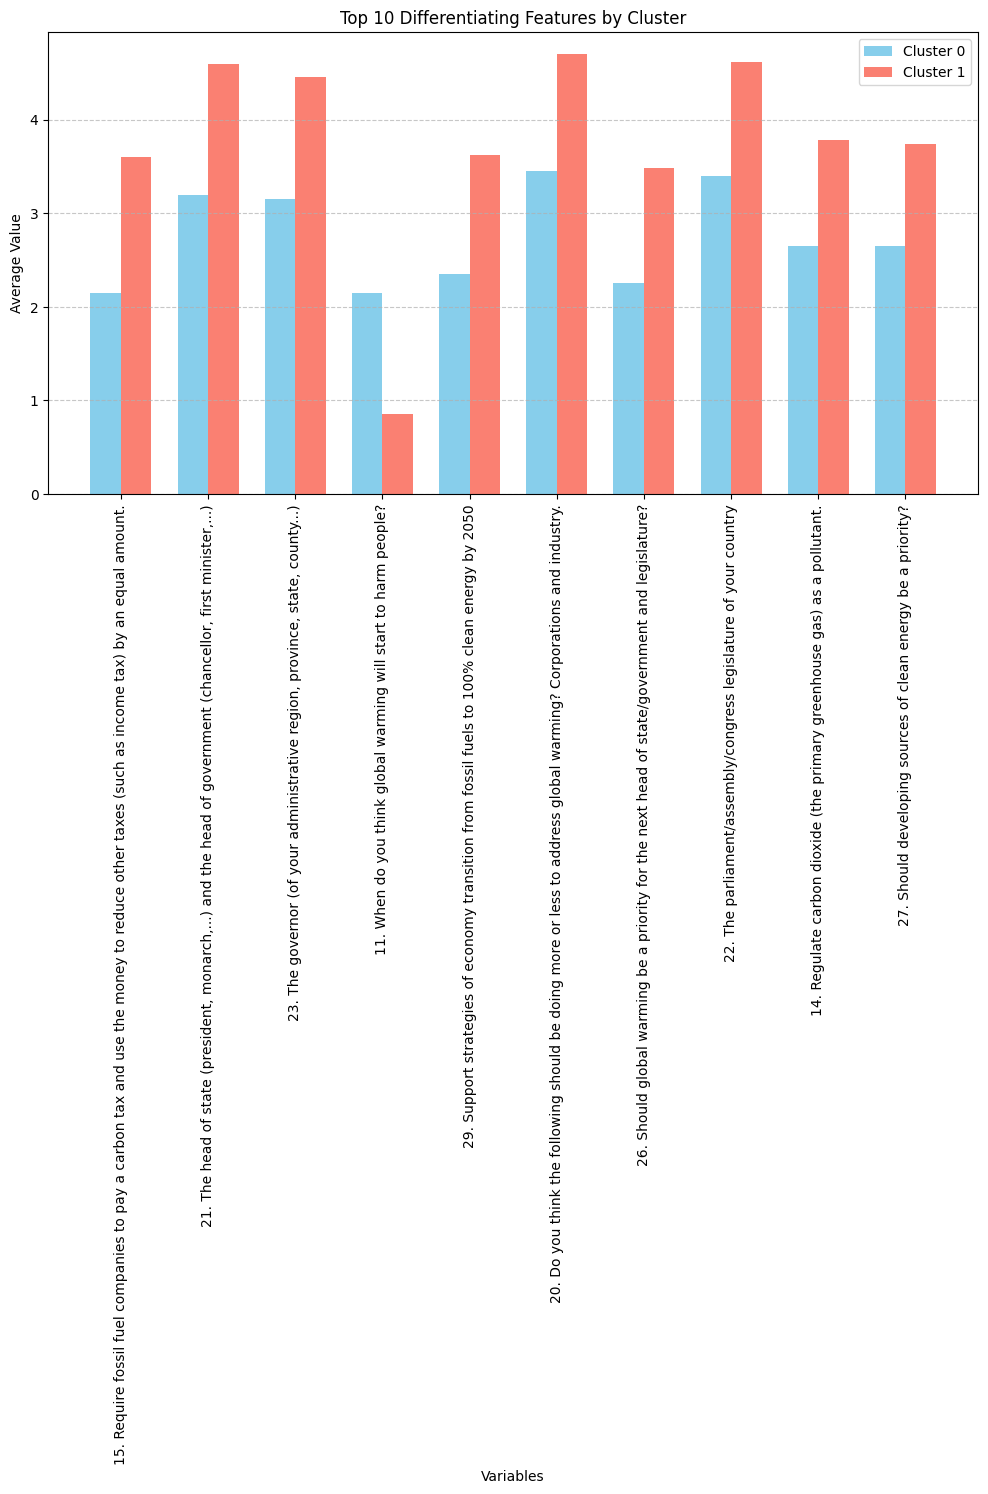

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Make sure you have run:
# cluster_profiles_sorted = cluster_profiles.reindex(...)

# STEP 1 — Select the top 10 most distinctive variables
top_features = cluster_profiles_sorted.head(10)

# STEP 2 — Extract mean values for each cluster
labels = top_features.index
cluster_0 = top_features[0]
cluster_1 = top_features[1]

# STEP 3 — Prepare X-axis positions
x = np.arange(len(labels))
bar_width = 0.35

# STEP 4 — Comparative bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, cluster_0, width=bar_width, label='Cluster 0', color='skyblue')
plt.bar(x + bar_width/2, cluster_1, width=bar_width, label='Cluster 1', color='salmon')

# STEP 5 — Add plot details
plt.xlabel('Variables')
plt.ylabel('Average Value')
plt.title('Top 10 Differentiating Features by Cluster')
plt.xticks(x, labels, rotation=90)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
